# Basit Dogrusal Regresyon

In [1]:
import pandas as pd
ad = pd.read_csv('Data/Advertising.csv')
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df = df.iloc[:,1:]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


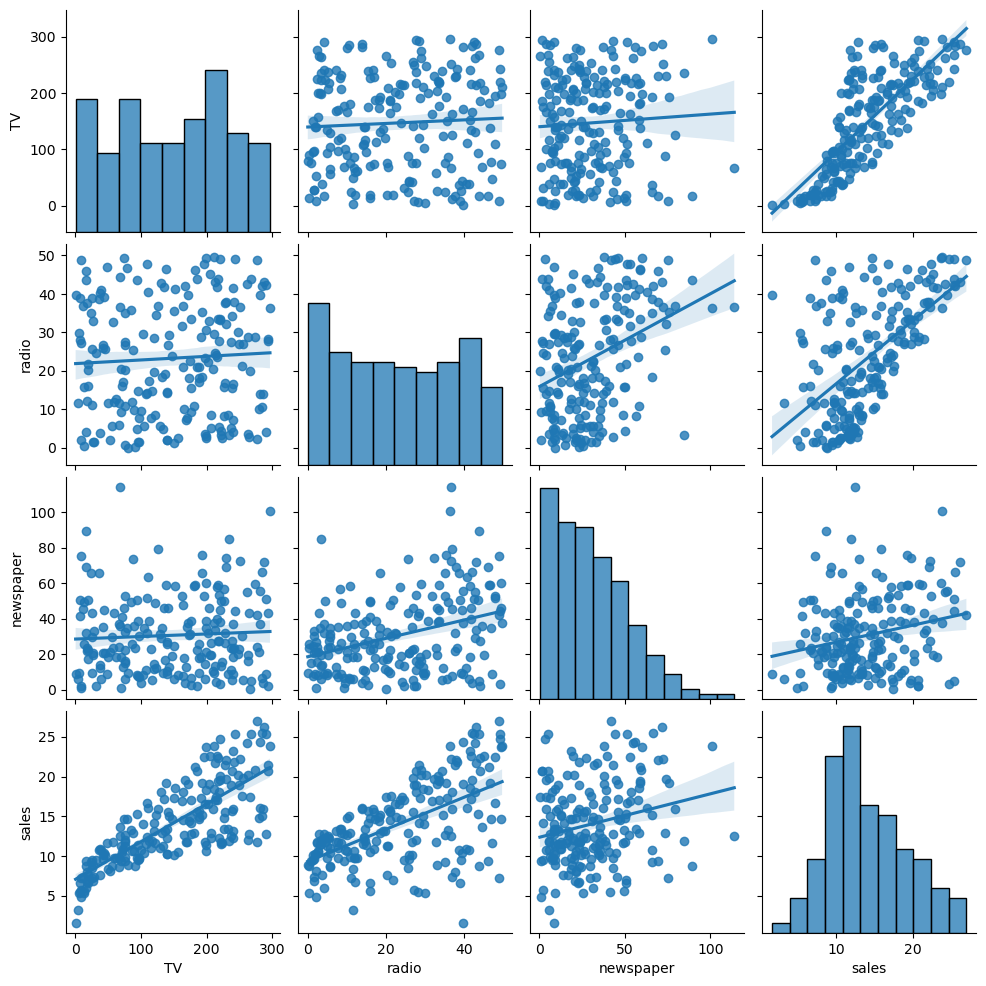

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(df, kind = 'reg')
plt.show()

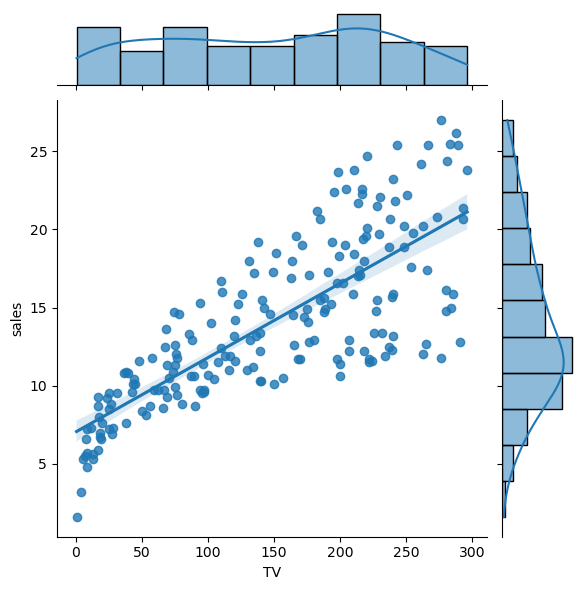

In [8]:
sns.jointplot(x = 'TV', y='sales', data = df, kind = 'reg')

## Statsmodels ile modelleme

In [9]:
import statsmodels.api as sm

In [10]:
X = df[['TV']]

In [11]:
X = sm.add_constant(X)

In [12]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [13]:
y = df['sales']

In [14]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [15]:
lm = sm.OLS(y, X)

In [16]:
model = lm.fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.47e-42
Time:                        17:08:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
import statsmodels.formula.api as smf
lm = smf.ols('sales ~ TV', df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.47e-42
Time:                        17:08:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [20]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [21]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [22]:
model.f_pvalue

1.467389700194647e-42

In [23]:
model.mse_model

3314.618166868649

In [24]:
model.rsquared_adj

0.6099148238341623

In [25]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [26]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [27]:
## Sklearn

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
X = df[['TV']]
y = df['sales']
reg = LinearRegression()
model = reg.fit(X,y)

In [30]:
model.score(X,y) # R^2 degeri

0.611875050850071

In [31]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Tahmin
model denklemi:

Sales = 7.03 + TV*0.04

ornegin 30 birim TV harcamasi oldugunda satislarin tahmini degeri ne olur ?

In [32]:
7.03 + 30*0.04

8.23

In [33]:
X = df[['TV']]
y = df['sales']
reg = LinearRegression()
model = reg.fit(X,y)

In [34]:
model.predict([[30]])

/Users/huseyinefkanalp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [35]:
yeni_veri = [[5],[90],[200]]

In [36]:
model.predict(yeni_veri)

/Users/huseyinefkanalp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.27027675, 11.31089119, 16.53992164])

## Artiklar ve Makine Ogrenmsesindeki Onemi

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
lm = smf.ols('sales ~ TV', df)
model = lm.fit()

In [39]:
mse = mean_squared_error(y, model.fittedvalues)

In [40]:
mse # Birim basina ortalama hata

10.512652915656757

In [41]:
import numpy as np
rmse = np.sqrt(mse)

In [42]:
rmse

3.2423221486546887

In [43]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [44]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [45]:
k_t = pd.DataFrame({'gercek_y': y[0:10],
                   'tahmin_y': reg.predict(X)[0:10]})

In [46]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [47]:
k_t ['hata'] = k_t['gercek_y'] - k_t['tahmin_y']

In [48]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [49]:
k_t['hata_kare'] = k_t['hata']**2

In [50]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [51]:
np.sum(k_t['hata_kare'])

92.90350329638102

In [52]:
np.mean(k_t['hata_kare'])

9.290350329638102

In [53]:
np.sqrt(np.mean(k_t['hata_kare']))

3.048007599996775

## Coklu Dogrusal Regresyon

Temel amac, bagimli ve bagimsiz degiskenler arasindaki iliskiyi ifade eden dogrusal fonksiyonu bulmaktir

In [56]:
df = ad.copy()
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [57]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [58]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [60]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [61]:
X = df.drop('sales', axis = 1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [62]:
X_train.shape

(160, 3)

In [63]:
y_train.shape

(160,)

In [65]:
X_test.shape

(40, 3)

In [66]:
y_test.shape

(40,)

In [67]:
training = df.copy()

In [68]:
## Statsmodels

In [69]:
lm = sm.OLS(y_train, X_train)

In [71]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                   1.28e-137
Time:                        17:16:00   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
## Scikit-learn

In [73]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [74]:
model.intercept_

2.979067338122629

In [75]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin

sales = 2.97 + + TV00.4 + radio0.18 + newspaper0.002

Ornegin 30 birim Tv harcamasi, 10 birim radio harcamasi, 40 birim gazete harcamasi oldugunda satislarin tahmini degeri ne olur?

In [77]:
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2
0,30,10,40


In [78]:
model.predict(yeni_veri)

/Users/huseyinefkanalp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.32334798])

In [81]:
# Egitim hatasi
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [82]:
rmse

1.6447277656443373

In [83]:
# Test hatasi
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [84]:
rmse

1.7815996615334506

## Model Tuning / Model Dogrulama

In [88]:
cross_val_score(model, X_train, y_train, cv=10, scoring = 'r2').mean()

0.791354859691634

In [92]:
np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error')).mean()

1.6513523730313335

In [93]:
np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, scoring = 'neg_mean_squared_error')).mean()

1.846277882399709